# PERFORMANCE COMPRESOR DE LA TURBINA A GAS

**Descripción de los datos:** Los datos presentados son datos reales extraidos del historiador de una central termoeléctrica (Exacuantum). El proceso de extracción de datos consistió en identificar las variables de interés para el cálculo de la eficiencia del compresor de la turbina. El historiador tiene capacidad de tener registro de los datos desde 2018 y estos datos son almacenados segundo a segundo, por lo que para facilidad del modelo, se seleccionará fechas específicas sin embargo se puede trabajar con intervalos de tiempos más grandes para robustecer los modelos realizados.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

## 01. Carga, descripción y limpieza de datos


### Descripción de los Datos



DATE	:	Instante de registro de datos

G1_DWATT:	Potencia de la Turbina a Gas (TG11)

G2_DWATT:	Potencia de la Turbina a Gas (TG12)

S1_DWATT:	Potencia de la  Turbina a Vapor (TV10)

G1_CTIM	:	Temperatura Ingreso al Compresor TG11

G2_CTIM	:	Temperatura Ingreso al Compresor TG12

G1_CPR	:	Ratio de Compresión del TG11

G2_CPR	:	Ratio de Compresión del TG12

G1_CTD	:	Temperatura de Descarga del Compresor TG11

G2_CTD	:	Temperatura de Descarga del Compresor TG12

G1_CPD	:	Presiónde Descarga del Compresor TG11

G2_CPD	:	Presiónde Descarga del Compresor TG12

G1_AT1	:	Temperatura de Ingreso a la Casa de Filtros TG11 - Sensor 01

G1_AT2	:	Temperatura de Ingreso a la Casa de Filtros TG11 - Sensor 02

G1_AT3	:	Temperatura de Ingreso a la Casa de Filtros TG11 - Sensor 03

G2_AT1	:	Temperatura de Ingreso a la Casa de Filtros TG12 - Sensor 01

G2_AT2	:	Temperatura de Ingreso a la Casa de Filtros TG12 - Sensor 02

G2_AT3	:	Temperatura de Ingreso a la Casa de Filtros TG12 - Sensor 03

G1_FQG	:	Flujo de combustible para combustión TG11

G2_FQG	:	Flujo de combustible para combustión TG12

G1_CSBHX:	Apertura de las IBH TG11

G2_CSBHX:	Apertura de las IBH TG12

PR_SR	:	Set Point RPF

STSURS_SR:	STATUS

BP_SR	:	Punto Base

STSAGC_SR:	ESTADO AGC

LLRA_SR	:	LIMITE INFERIOR

HLRA_SR	:	LIMITE SUPERIOR

LR_SR	:	SET LOCAL/REMOTO RSF

FR_SR	:	ESTADO DE SEGUIMIENTO RSF

STATUS_RSF:	STATUS_RSF

11EIC3920:	Set Potencia TG11

12EIC3920:	Set Potencia TG12

G1_AFDP1 :	DIF.PRES. PRE FILTRO TG11

G1_AFDP2A:	DIF.PRES. FILTRO FINO TG11

G1_AFDP2B:	DIF.PRES. PRE TOTAL TG11

G2_AFDP1 :	DIF.PRES. PRE FILTRO TG12

G2_AFDP2A:	DIF.PRES. FILTRO FINO TG12

G2_AFDP2B:	DIF.PRES. PRE TOTAL TG12





### Carga de Datos

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/03. Machine Learning - Coding Dojo/00. Actividades Plataforma/01. PROYECTO 02/Extractor_Compresor_TG_30_Abril.xlsx',
                   skiprows=2)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7681 entries, 0 to 7680
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        7681 non-null   datetime64[ns]
 1   G1_DWATT    7681 non-null   float64       
 2   G2_DWATT    7681 non-null   float64       
 3   S1_DWATT    7681 non-null   float64       
 4   G1_CTIM     7681 non-null   float64       
 5   G2_CTIM     7681 non-null   float64       
 6   G1_CPR      7681 non-null   float64       
 7   G2_CPR      7681 non-null   float64       
 8   G1_CTD      7681 non-null   float64       
 9   G2_CTD      7681 non-null   float64       
 10  G1_CPD      7681 non-null   float64       
 11  G2_CPD      7681 non-null   float64       
 12  G1_AT1      7681 non-null   float64       
 13  G1_AT2      7681 non-null   float64       
 14  G1_AT3      7681 non-null   float64       
 15  G2_AT1      7681 non-null   float64       
 16  G2_AT2      7681 non-nul

DATE    G1_DWATT    G2_DWATT    S1_DWATT    G1_CTIM  \
0 2023-07-07 00:00:00  182.464020  182.815323  185.923462  50.658714   
1 2023-07-07 00:15:00  178.848755  178.347397  184.303558  50.256260   
2 2023-07-07 00:30:00  185.135635  184.782959  186.302948  50.537636   
3 2023-07-07 00:45:00  183.619492  184.081924  186.112854  50.449390   
4 2023-07-07 01:00:00  185.168991  184.731506  184.871857  50.201321   

     G2_CTIM     G1_CPR     G2_CPR      G1_CTD      G2_CTD  ...     FR_SR  \
0  50.662487  16.292986  15.948944  721.421936  709.082214  ...  1.159668   
1  50.407425  15.921415  15.638843  710.943787  701.566467  ...  1.159668   
2  50.722748  16.467556  16.128410  724.413208  712.161804  ...  1.159665   
3  50.741253  16.328714  16.006746  720.817444  709.464478  ...  1.159668   
4  50.684986  16.455938  16.089300  723.259033  711.226379  ...  1.159763   

   STATUS_RSF   11EIC3920   12EIC3920  G1_AFDP1  G1_AFDP2A  G1_AFDP2B  \
0           0  182.629898  182.632828  0.780725   1.106780   2.650956   
1           0  178.586090  178.150406  0.745002   1.060780   2.536172   
2           0  185.032745  184.888687  0.785962   1.104102   2.673450   
3           0  183.977829  184.566422  0.779784   1.089947   2.642683   
4           0  185.032745  184.859390  0.789154   1.082511   2.658831   

   G2_AFDP1  G2_AFDP2A  G2_AFDP2B  
0  0.826864   0.929203   2.477985  
1  0.809831   0.913747   2.422173  
2  0.843122   0.931730   2.523828  
3  0.848774   0.930066   2.506731  
4  0.842715   0.939007   2.519876  

[5 rows x 39 columns]

In [4]:
df.tail()

DATE    G1_DWATT    G2_DWATT    S1_DWATT    G1_CTIM  \
7676 2023-09-24 23:00:00  189.076172  189.000305  190.352097  49.497013   
7677 2023-09-24 23:15:00  187.982315  188.116074  190.019409  49.361938   
7678 2023-09-24 23:30:00  188.500381  188.637253  191.049103  48.946903   
7679 2023-09-24 23:45:00  188.958725  188.567825  191.448547  49.336880   
7680 2023-09-25 00:00:00  189.044754  188.820969  190.500351  49.700512   

        G2_CTIM     G1_CPR     G2_CPR      G1_CTD      G2_CTD  ...     FR_SR  \
7676  50.139885  16.596910  16.374844  725.192444  719.496155  ...  2.162211   
7677  50.046780  16.545895  16.318449  724.398743  718.463135  ...  2.160955   
7678  49.480095  16.567862  16.339125  724.304993  717.835205  ...  2.160745   
7679  49.538872  16.575407  16.350082  724.765808  718.114014  ...  2.162415   
7680  50.102791  16.619705  16.388622  724.891602  718.927124  ...  2.161790   

      STATUS_RSF   11EIC3920   12EIC3920  G1_AFDP1  G1_AFDP2A  G1_AFDP2B  \
7676           0  188.343979  188.257828  0.851879   1.177720   2.794652   
7677           0  188.607697  188.931656  0.847465   1.176497   2.794067   
7678           0  188.959335  188.609390  0.911993   1.155405   2.838304   
7679           0  188.930038  188.902359  0.873723   1.187417   2.857776   
7680           0  188.431885  188.287125  0.866073   1.197520   2.895685   

      G2_AFDP1  G2_AFDP2A  G2_AFDP2B  
7676  0.909850   0.996781   2.682868  
7677  0.903901   0.977057   2.682014  
7678  0.959851   0.968975   2.707443  
7679  0.908941   0.986858   2.692111  
7680  0.869565   1.009238   2.673021  

[5 rows x 39 columns]

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df_original = df

### Filtrado de datos

In [7]:
df.describe().T

count                 mean                  min  \
DATE          7681  2023-08-16 00:00:00  2023-07-07 00:00:00   
G1_DWATT    7681.0           174.686036            -0.550947   
G2_DWATT    7681.0           176.241499            -1.740519   
S1_DWATT    7681.0           177.921064          -360.003937   
G1_CTIM     7681.0            52.056216                  0.0   
G2_CTIM     7681.0            52.547909                  0.0   
G1_CPR      7681.0             15.54617                  0.0   
G2_CPR      7681.0            15.488625                  0.0   
G1_CTD      7681.0             692.2805                  0.0   
G2_CTD      7681.0           696.274193                  0.0   
G1_CPD      7681.0            210.33715            -0.191841   
G2_CPD      7681.0           209.565718             -0.45248   
G1_AT1      7681.0            69.535007                  0.0   
G1_AT2      7681.0            70.223508                  0.0   
G1_AT3      7681.0            70.209513                  0.0   
G2_AT1      7681.0            72.181746                  0.0   
G2_AT2      7681.0            71.794573                  0.0   
G2_AT3      7681.0            71.031898                  0.0   
G1_FQG      7681.0            22.094828                  0.0   
G2_FQG      7681.0            22.212511                  0.0   
G1_CSBHX    7681.0             1.150677            -0.064309   
G2_CSBHX    7681.0             2.326767             -0.57312   
PR_SR       7681.0           493.051045           198.303223   
STSURS_SR   7681.0             0.323265                  0.0   
BP_SR       7681.0            523.43771            -0.659198   
STSAGC_SR   7681.0             0.994923                  0.0   
LLRA_SR     7681.0           515.454257           391.003265   
HLRA_SR     7681.0           549.141594           540.068481   
LR_SR       7681.0             0.042052                  0.0   
FR_SR       7681.0             1.988336             0.157203   
STATUS_RSF  7681.0             0.041271                  0.0   
11EIC3920   7681.0           174.644915            -0.543027   
12EIC3920   7681.0           176.242016            -1.996084   
G1_AFDP1    7681.0             0.777642                  0.0   
G1_AFDP2A   7681.0             1.031164                  0.0   
G1_AFDP2B   7681.0             2.519427                  0.0   
G2_AFDP1    7681.0             0.843409                  0.0   
G2_AFDP2A   7681.0             0.893791            -0.008382   
G2_AFDP2B   7681.0             2.421092                  0.0   

                            25%                  50%                  75%  \
DATE        2023-07-27 00:00:00  2023-08-16 00:00:00  2023-09-05 00:00:00   
G1_DWATT             183.537155           188.171753           189.034882   
G2_DWATT             183.577377            188.42778           189.148148   
S1_DWATT             185.766327           189.975189            190.67894   
G1_CTIM               49.386402            49.827522            50.364944   
G2_CTIM               49.699802            50.175606            50.771984   
G1_CPR                16.343668            16.542755            16.592112   
G2_CPR                16.001774            16.370453             16.42152   
G1_CTD               719.601196           724.496033           725.398071   
G2_CTD               708.358459           718.520996             719.7995   
G1_CPD               221.882858            224.52269             225.3703   
G2_CPD               217.086838           221.984039           222.912567   
G1_AT1                66.129913            67.723289             72.05323   
G1_AT2                66.879486            68.481033            72.700546   
G1_AT3                 66.97303              68.6521            72.599739   
G2_AT1                69.240486            71.001282            74.230377   
G2_AT2                68.822929            70.574165            73.922043   
G2_AT3                68.232117            69.948441            72

Antes de separar unidades con sus respectivas variables, necesitamos identificar en qué tipo de estado realizaremos el cálculo de la eficiencia del compresor y de la descripción del ensayo observamos que en las potencias de las unidades se presentan potencias desde 0 a 185. Lo que nos indica que se presentaros parada de planta de la unidad, es decir.

Los criterios que utilizaremos para realizar el filtro de condiciones operativas de la Central de Ciclo combinado serán :



*   Operación de la planta en carga base, es decir:
 *   Potencia TG11, TG12, TV10 mayor a 175 MW
 *   Operación del sistema Chiller, el cual lleva valores de seteo de temperatura de ingreso al compresor a 48°F
 *   Operación de la central sin estar en modo RSF, lo cual hace oscilar la potencia de la planta de acuerdo a la demanda del sistema.
  



*Filtro por potencia de las unidades*

In [8]:
fig = px.line(df, x='DATE', y=['G1_DWATT', 'G2_DWATT', 'S1_DWATT'], title='Potencia de las Unidades de Generación del 07-Jul-2023 al 14-Ago-2023')
fig.show()

*Diagrama de cargas de las unidades de generación de la central termoeléctrica de ciclo combinado TG11 TG12 & TV10*

Por inspección visual observamos que existen valores outliers para la turbina a vapor, ya que esta no puede brindar valores negativos de potencia. Motivo por el cual para eliminar los valores outliers y solo trabajar con potencias base.

In [9]:
#TG11_filter = df['G1_DWATT'] > 175
#TG12_filter = df['G2_DWATT'] > 175
#TV10_filter = df['S1_DWATT'] > 175
#df = df.loc[(TG11_filter & TG12_filter & TV10_filter),:]

In [10]:
fig = px.line(df, x='DATE', y=['G1_DWATT', 'G2_DWATT', 'S1_DWATT'], title='Potencia de las Unidades de Generación del 07-Jul-2023 al 14-Ago-2023')
fig.show()

*Diagrama de carga despues de filtrar potencia para asegurar que se esté operado en ciclo combinado 2x1*

Observamos que la data tiene oscilaciones, esta se debe ya que la planta usualmente sube y baja carga dependiendo de la demanda del sistema, necesitamos filtrar mejor la data para solo quedarnos en una condición operativa, la cual será en carga base, con chiller en servicio(el cual hace ganar una potencia de 12MW por tubina a gas) y sin dar RSF al sistema.

In [11]:
#fig = px.line(df, x='DATE', y=['G1_CTIM', 'G2_CTIM'], title='Temperatura de Ingreso al compresor del 07-Jul-2023 al 14-Ago-2023')
#fig.show()

*Temperatura de ingreso al compresor, para validación de chiller en servicio.*

In [12]:
CTIM_filter = df['G1_CTIM'] < 52 # Esto asegura que el sistema Chiller esté en servicio, ya que este lleva la temperatura de ingreso del compresor a temperaturas de diseño
df = df.loc[(CTIM_filter),:]

In [13]:
fig = px.line(df, x='DATE', y=['G1_CTIM', 'G2_CTIM'], title='Temperatura de Ingreso al compresor del 07-Jul-2023 al 14-Ago-2023')
fig.show()

para poder filtrar que la central no esté brindando RSF

* PR_SR	:	Set Point RPF

* STSURS_SR:	STATUS

* BP_SR	:	Punto Base

* STSAGC_SR:	ESTADO AGC

* LLRA_SR	:	LIMITE INFERIOR

* HLRA_SR	:	LIMITE SUPERIOR

* LR_SR	:	SET LOCAL/REMOTO RSF

* FR_SR	:	ESTADO DE SEGUIMIENTO RSF

* STATUS_RSF:	STATUS_RSF

In [14]:
fig = px.line(df, x='DATE', y=['STSURS_SR','LR_SR','STATUS_RSF'], title='Variables indicadoras de estatus de RPF 07-Jul-2023 al 14-Ago-2023')
fig.show()

Para asegurar la operación sin Reserva Secundaria de Frecuencia, utilizaremos todos los valores de seteo

In [15]:
#df[['STSURS_SR','LR_SR','STATUS_RSF']].value_counts()

In [16]:
#SR_filter = df['STSURS_SR'] < 1
#LR_SR_filter = df['LR_SR'] < 1
#RSF_filter = df['STATUS_RSF'] < 1
#df_sin_RSF = df.loc[(SR_filter & LR_SR_filter & RSF_filter),:]
#df_sin_RSF

In [17]:
#fig1 = px.line(df_sin_RSF, x='DATE', y=['G1_DWATT', 'G2_DWATT', 'S1_DWATT'], title='Potencia de las Unidades de Generación del 07-Jul-2023 al 25-Sep-2023',
#              labels={'value': 'Potencia (DWATT)'})
#fig2 = px.line(df_sin_RSF, x='DATE', y=['G1_CTIM', 'G2_CTIM'], title='Monitoreo de temperatura de ingreso al compresor del 07-Jul-2023 al 25-Sep-2023',
#              labels={'value': 'Temperatura Ingreso al Compresor °F'})
#fig1.show()
#fig2.show()

*Aseguramos que la potencia de las unidades sean mayores a 175, que el sistema chiller esté en funcionamiento y que no se esté orfertando RSF, que haría variar la potencia bruscamente*

Observamos que hay variaciones de potencia, lo que puede significar que la carga ha estado oscilando por el RPF. Podemso deducir que los picos más altos son cuando se opera a plena carga y sin RPF lo que significaría que la unidad está liberada.

Si embargo observamos que se pierden muchos intervalos de potencia donde la potencia es la optima para el análisis, por lo que en vez de filtrar los datos por RSF, actualizaremos el filtro de potencia para ajustar que esta sea mayor a 185 MW para cada unidad

In [18]:
# @title Ajuste del Filtro de potencia de las unidades
#TG11_filter = df['G1_DWATT'] > 185
#TG12_filter = df['G2_DWATT'] > 185
#TV10_filter = df['S1_DWATT'] > 185
#df = df.loc[(TG11_filter & TG12_filter & TV10_filter),:]

In [19]:
#fig1 = px.line(df, x='DATE', y=['G1_DWATT', 'G2_DWATT', 'S1_DWATT'], title='Potencia de las Unidades de Generación del 07-Jul-2023 al 25-Sep-2023',
#              labels={'value': 'Potencia (DWATT)'})
#fig2 = px.line(df, x='DATE', y=['G1_CTIM', 'G2_CTIM'], title='Monitoreo de temperatura de ingreso al compresor del 07-Jul-2023 al 25-Sep-2023',
#              labels={'value': 'Temperatura Ingreso al Compresor °F'})
#fig1.show()
#fig2.show()

# Cálculo de la eficiencia del compresor


Determinaremos la eficiencia del compresor mediante el siguiente cálculo:

Temperatura de Descarga Ideal(T_i) = CTIM*CPR^(1-1/1.4)

Eficiencia del Compresor = (T_i-CTIM)/(CTD-CTIM)


Consideramos que las variables de CTIM y CTD están en grafos Farenheit y necesitamos llevar todo a grados Kelvin.

( X°F − 32) × 5/9 + 273.15

quedando la formula de la siguiente manera

* CTIM_TG11 =  (G1_CTIM-32)*(5/9)+273.15
* CTD_TG11 =   (G1_CTD-32)*(5/9)+273.15
* Temperatura Descarga ideal (T_ideal) = ((G1_CTIM-32)*(5/9)+273)*(G1_CPR**(1-1.4))
* Eficiencia del Compresor = (T_ideal - CTIM)/(CTD - CTIM)
* Eficiencia del Compresor = ((((G1_CTIM-32)*(5/9)+273)*(G1_CPR**(1-1.4)))-((G1_CTIM-32)*(5/9)+273))/(((G1_CTD-32)*(5/9)+273)-((G1_CTIM-32)*(5/9)+273))
G1_CPR



In [20]:
# @title Conversión de Temperaturas
df['G1_CTIM_K'] = (df['G1_CTIM']-32)*(5/9)+273.15
df['G2_CTIM_K'] = (df['G2_CTIM']-32)*(5/9)+273.15
df['G1_CTD_K'] = (df['G1_CTD']-32)*(5/9)+273.15
df['G2_CTD_K'] = (df['G2_CTD']-32)*(5/9)+273.15

<ipython-input-20-9b1c85d9fb7c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-9b1c85d9fb7c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-9b1c85d9fb7c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-9b1c85d

In [21]:
# @title Cálculo de la temperatura Ideal
df['G1_T_ideal'] = df['G1_CTIM_K']*(df['G1_CPR']**(1-(1/1.4)))
df['G2_T_ideal'] = df['G2_CTIM_K']*(df['G2_CPR']**(1-(1/1.4)))

<ipython-input-21-cc4f251d7662>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-cc4f251d7662>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# @title Cálculo de la Eficiencia del Compresor
df['G1_efic_comp'] = (df['G1_T_ideal'] - df['G1_CTIM_K'])/(df['G1_CTD_K']-df['G1_CTIM_K'])
df['G2_efic_comp'] = (df['G2_T_ideal'] - df['G2_CTIM_K'])/(df['G2_CTD_K']-df['G2_CTIM_K'])

<ipython-input-22-3af022753c9f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3af022753c9f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
fig = px.line(df, x='DATE', y=['G1_efic_comp', 'G2_efic_comp',], title='Eficiencia del compresor de las turbinas del 07-Jul-2023 al 25-Sep-2023',
              labels={'value': 'Eficiencia'})
fig.show()

In [24]:
df[['G1_efic_comp', 'G2_efic_comp']].describe().T

count  mean  std  min       25%       50%       75%       max
G1_efic_comp  6889.0  -inf  NaN -inf  0.927993  0.928733  0.929541  0.939863
G2_efic_comp  6889.0  -inf  NaN -inf  0.931826  0.933658  0.935014  0.941831

In [25]:
filter_efi_TG11 = (df['G1_efic_comp'] < 1) & (df['G1_efic_comp'] > 0)
filter_efi_TG12 = (df['G2_efic_comp'] < 1) & (df['G2_efic_comp'] > 0)

In [26]:
df = df.loc[filter_efi_TG11, :]
df = df.loc[filter_efi_TG12, :]

In [27]:
fig = px.line(df, x='DATE', y=['G1_efic_comp', 'G2_efic_comp',], title='Eficiencia del compresor de las turbinas del 07-Jul-2023 al 25-Sep-2023',
              labels={'value': 'Eficiencia'})
fig.show()

In [28]:
df[['G1_efic_comp', 'G2_efic_comp']].describe().T

count      mean       std       min       25%       50%  \
G1_efic_comp  6887.0  0.928386  0.003588  0.878754  0.927994  0.928734   
G2_efic_comp  6887.0  0.933079  0.005316  0.682348  0.931830  0.933659   

                   75%       max  
G1_efic_comp  0.929542  0.939863  
G2_efic_comp  0.935014  0.941831

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6887 entries, 0 to 7680
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          6887 non-null   datetime64[ns]
 1   G1_DWATT      6887 non-null   float64       
 2   G2_DWATT      6887 non-null   float64       
 3   S1_DWATT      6887 non-null   float64       
 4   G1_CTIM       6887 non-null   float64       
 5   G2_CTIM       6887 non-null   float64       
 6   G1_CPR        6887 non-null   float64       
 7   G2_CPR        6887 non-null   float64       
 8   G1_CTD        6887 non-null   float64       
 9   G2_CTD        6887 non-null   float64       
 10  G1_CPD        6887 non-null   float64       
 11  G2_CPD        6887 non-null   float64       
 12  G1_AT1        6887 non-null   float64       
 13  G1_AT2        6887 non-null   float64       
 14  G1_AT3        6887 non-null   float64       
 15  G2_AT1        6887 non-null   float64      

In [30]:
# @title División de Datos para la Turbina a Gas - TG11
df_TG11 = df[['G1_DWATT','G1_CTIM','G1_CTD','G1_CPD','G1_AT1','G1_AT2','G1_AT3','G1_FQG','G1_CSBHX','G1_AFDP1','G1_AFDP2A','G1_AFDP2B','G1_efic_comp']]

In [31]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocesamiento TG11

In [32]:
num_selector = make_column_selector(dtype_include='number')

In [33]:
standard_scaler = StandardScaler()

In [34]:
imputer_num = SimpleImputer(strategy="mean")

In [35]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dc8d0d436a0>)])

In [36]:
X_TG11 = df_TG11.drop(['G1_efic_comp'], axis=1)
y_TG11 = df_TG11['G1_efic_comp']

In [37]:
col_transformer.fit(X_TG11)
X_processed_TG11 = col_transformer.transform(X_TG11)

In [38]:
X_processed_TG11 = pd.DataFrame(X_processed_TG11, columns=col_transformer.get_feature_names_out())

In [39]:
X_processed_TG11

pipeline__G1_DWATT  pipeline__G1_CTIM  pipeline__G1_CTD  \
0              -0.518824           1.421734         -0.011701   
1              -1.054181           0.786337         -1.159675   
2              -0.123205           1.230575          0.316020   
3              -0.347719           1.091252         -0.077928   
4              -0.118266           0.699599          0.189570   
...                  ...                ...               ...   
6882            0.460319          -0.412366          0.401392   
6883            0.298338          -0.625622          0.314435   
6884            0.375055          -1.280882          0.304164   
6885            0.442927          -0.665185          0.354650   
6886            0.455667          -0.091081          0.368432   

      pipeline__G1_CPD  pipeline__G1_AT1  pipeline__G1_AT2  pipeline__G1_AT3  \
0            -0.295637         -0.328800         -0.280588         -0.286944   
1            -1.133722         -0.330857         -0.318885         -0.306605   
2             0.092156         -0.351331         -0.324901         -0.343437   
3            -0.122441         -0.439770         -0.394869         -0.409874   
4             0.171812         -0.438730         -0.467399         -0.376641   
...                ...               ...               ...               ...   
6882          0.424245         -0.829803         -0.854728         -0.872080   
6883          0.281904         -0.859786         -0.837055         -0.828234   
6884          0.303912         -0.900528         -0.892131         -0.770774   
6885          0.405182         -0.788938         -0.821191         -0.772112   
6886          0.530187         -0.734861         -0.775445         -0.822686   

      pipeline__G1_FQG  pipeline__G1_CSBHX  pipeline__G1_AFDP1  \
0            -0.480966           -0.258883           -0.919852   
1            -0.604600           -0.224944           -1.686916   
2            -0.360133           -0.252652           -0.807411   
3            -0.448848           -0.245500           -0.940061   
4            -0.357356           -0.252403           -0.738856   
...                ...                 ...                 ...   
6882         -0.251525           -0.066830            0.607985   
6883         -0.277229           -0.080617            0.513199   
6884         -0.278900           -0.093881            1.898769   
6885         -0.271071           -0.100998            1.077017   
6886         -0.223591           -0.128412            0.912768   

      pipeline__G1_AFDP2A  pipeline__G1_AFDP2B  
0                0.145169            -0.197202  
1               -0.334023            -0.960808  
2                0.117274            -0.047561  
3               -0.030182            -0.252239  
4               -0.107647            -0.144813  
...                   ...                  ...  
6882             0.884164             0.758748  
6883             0.871423             0.754859  
6884             0.651706             1.049147  
6885             0.985177             1.178683  
6886             1.090423             1.430876  

[6887 rows x 12 columns]

In [40]:
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed_TG11)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed_TG11, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

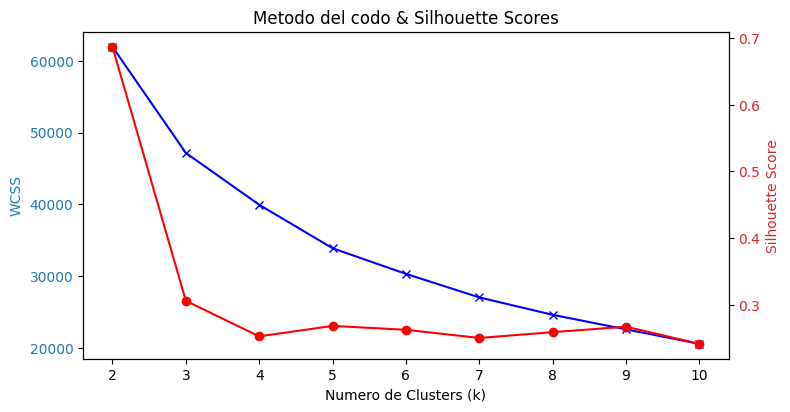

In [41]:
# Plotting the elbow method and silhouette scores
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.set_xlabel('Numero de Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(K, wcss, 'bx-')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(K, silhouette_scores, 'ro-')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Metodo del codo & Silhouette Scores')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_processed_TG11)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
df_TG11['Cluster'] = clusters
df_TG11

<ipython-input-44-506adbcfa257>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



G1_DWATT    G1_CTIM      G1_CTD      G1_CPD     G1_AT1     G1_AT2  \
0     182.464020  50.658714  721.421936  220.940674  67.716599  68.681351   
1     178.848755  50.256260  710.943787  215.409454  67.705605  68.479942   
2     185.135635  50.537636  724.413208  223.500046  67.596191  68.448303   
3     183.619492  50.449390  720.817444  222.083740  67.123573  68.080338   
4     185.168991  50.201321  723.259033  224.025757  67.129135  67.698898   
...          ...        ...         ...         ...        ...        ...   
7676  189.076172  49.497013  725.192444  225.691772  65.039238  65.661911   
7677  187.982315  49.361938  724.398743  224.752350  64.879013  65.754852   
7678  188.500381  48.946903  724.304993  224.897598  64.661285  65.465202   
7679  188.958725  49.336880  724.765808  225.565964  65.257622  65.838280   
7680  189.044754  49.700512  724.891602  226.390976  65.546608  66.078865   

         G1_AT3     G1_FQG  G1_CSBHX  G1_AFDP1  G1_AFDP2A  G1_AFDP2B  \
0     68.666046  22.123453  0.001568  0.780725   1.106780   2.650956   
1     68.566742  21.759668  0.021875  0.745002   1.060780   2.536172   
2     68.380699  22.478994  0.005296  0.785962   1.104102   2.673450   
3     68.045120  22.217957  0.009575  0.779784   1.089947   2.642683   
4     68.212982  22.487167  0.005445  0.789154   1.082511   2.658831   
...         ...        ...       ...       ...        ...        ...   
7676  65.710495  22.798567  0.116482  0.851879   1.177720   2.794652   
7677  65.931961  22.722935  0.108233  0.847465   1.176497   2.794067   
7678  66.222198  22.718018  0.100297  0.911993   1.155405   2.838304   
7679  66.215439  22.741055  0.096038  0.873723   1.187417   2.857776   
7680  65.959984  22.880760  0.079635  0.866073   1.197520   2.895685   

      G1_efic_comp  Cluster  
0         0.927937        0  
1         0.930091        0  
2         0.928557        0  
3         0.929161        0  
4         0.928733        0  
...            ...      ...  
7676      0.927922        0  
7677      0.927102        0  
7678      0.926542        0  
7679      0.927374        0  
7680      0.929647        0  

[6887 rows x 14 columns]

In [45]:
cluster_summary = df_TG11.groupby('Cluster').mean()

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Inicializar listas para almacenar resultados
wcss = {'KMeans': [], 'DBSCAN': [], 'Agglomerative': []}
silhouette_scores = {'KMeans': [], 'DBSCAN': [], 'Agglomerative': []}

# Rango de clusters para KMeans y AgglomerativeClustering
K = range(2, 11)

# KMeans clustering
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed_TG11)
    wcss['KMeans'].append(kmeans.inertia_)
    silhouette_scores['KMeans'].append(silhouette_score(X_processed_TG11, kmeans.labels_))

# Agglomerative Clustering
for k in K:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    labels = agglomerative.fit_predict(X_processed_TG11)
    silhouette_scores['Agglomerative'].append(silhouette_score(X_processed_TG11, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

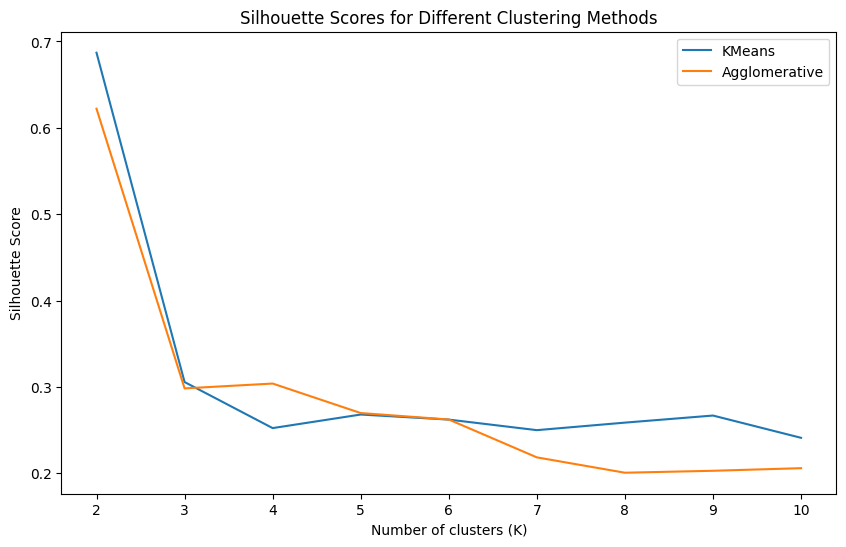

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores['KMeans'], label='KMeans')

plt.plot(K, silhouette_scores['Agglomerative'], label='Agglomerative')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clustering Methods')
plt.legend()
plt.show()

Observamos que tienen un comportamiento similar y que a partir de agrupación 03 se tiene un bajo Silhouette Score, dado que el comportamiento de las variables es similar para los datos de la TG12, trataremos de reducir dimensiones para evaluar los mismos modelos y ver si encontramos una agrupación más clara

In [ ]:
# DBSCAN clustering
eps_values = [0.3, 0.5, 0.7, 1.0]  # Valores de epsilon a probar
min_samples = 5  # Número mínimo de muestras
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_processed_TG11)
    if len(set(labels)) > 1:
        silhouette_scores['DBSCAN'].append(silhouette_score(X_processed_TG11, labels))
    else:
        silhouette_scores['DBSCAN'].append(-1)  # Si hay solo un cluster, el score es inválido

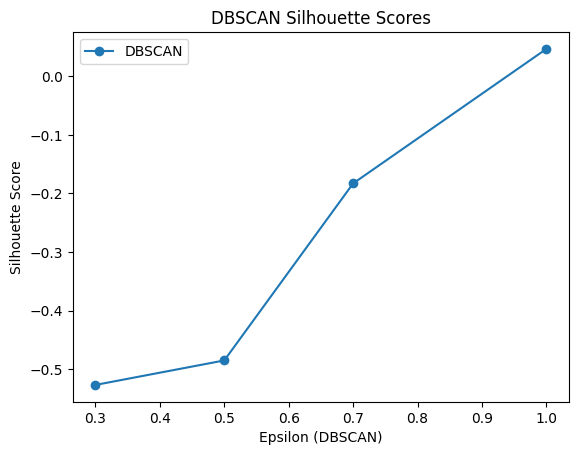

In [49]:
plt.plot(eps_values, silhouette_scores['DBSCAN'], label='DBSCAN', marker='o')
plt.xlabel('Epsilon (DBSCAN)')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Silhouette Scores')
plt.legend()
plt.show()

In [42]:
#@title Cluster Optimo: 2
optimal_clusters = 2

# PREPROCESAMIENTO TG12

In [55]:
df_TG12 = df[['G2_DWATT','G2_CTIM','G2_AT1','G2_AT2','G2_AT3','G2_CSBHX','G2_efic_comp']]

In [56]:
num_selector = make_column_selector(dtype_include='number')

In [57]:
standard_scaler = StandardScaler()

In [58]:
imputer_num = SimpleImputer(strategy="mean")

In [59]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dc8d1953d60>)])

In [61]:
X_TG12 = df_TG12.drop(['G2_efic_comp'], axis=1)
y_TG12 = df_TG12['G2_efic_comp']

In [62]:
col_transformer.fit(X_TG12)
X_processed_TG12 = col_transformer.transform(X_TG12)

In [63]:
X_processed_TG12 = pd.DataFrame(X_processed_TG12, columns=col_transformer.get_feature_names_out())

In [64]:
X_processed_TG12

pipeline__G2_DWATT  pipeline__G2_CTIM  pipeline__G2_AT1  \
0              -0.400478           0.484086         -0.244676   
1              -0.967549           0.251534         -0.347132   
2              -0.150745           0.539028         -0.315046   
3              -0.239721           0.555900         -0.303199   
4              -0.157275           0.504599         -0.331534   
...                  ...                ...               ...   
6882            0.384523           0.007606         -0.737878   
6883            0.272295          -0.077282         -0.741723   
6884            0.338444          -0.593954         -0.787244   
6885            0.329632          -0.540364         -0.791818   
6886            0.361761          -0.026214         -0.774088   

      pipeline__G2_AT2  pipeline__G2_AT3  pipeline__G2_CSBHX  
0            -0.257306         -0.227536           -0.061351  
1            -0.298137         -0.268257           -0.045047  
2            -0.329226         -0.247897           -0.060609  
3            -0.325685         -0.289890           -0.047481  
4            -0.320249         -0.344095           -0.035752  
...                ...               ...                 ...  
6882         -0.753148         -0.778428           -0.214494  
6883         -0.733264         -0.773949           -0.226309  
6884         -1.047367         -0.960781           -0.250915  
6885         -0.906609         -0.759565           -0.247404  
6886         -0.775508         -0.785847           -0.228474  

[6887 rows x 6 columns]

In [65]:
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed_TG11)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed_TG12, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

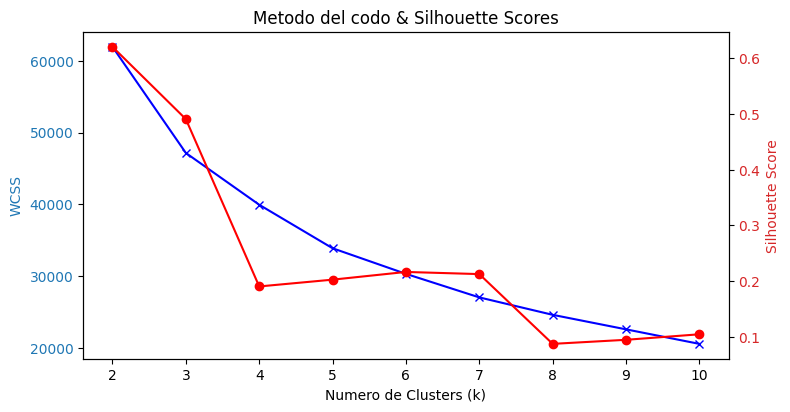

In [66]:
# Plotting the elbow method and silhouette scores
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.set_xlabel('Numero de Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(K, wcss, 'bx-')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(K, silhouette_scores, 'ro-')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Metodo del codo & Silhouette Scores')
plt.show()

In [67]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_processed_TG12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [68]:
df_TG12['Cluster'] = clusters
df_TG12

<ipython-input-68-29a13e45cf3c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



G2_DWATT    G2_CTIM     G2_AT1     G2_AT2     G2_AT3  G2_CSBHX  \
0     182.815323  50.662487  71.029396  70.565109  69.967819  0.595173   
1     178.347397  50.407425  70.565247  70.377708  69.787674  0.623664   
2     184.782959  50.722748  70.710602  70.235023  69.877747  0.596470   
3     184.081924  50.741253  70.764275  70.251274  69.691971  0.619411   
4     184.731506  50.684986  70.635910  70.276222  69.452171  0.639907   
...          ...        ...        ...        ...        ...       ...   
7676  189.000305  50.139885  68.795067  68.289375  67.530708  0.327557   
7677  188.116074  50.046780  68.777649  68.380638  67.550522  0.306910   
7678  188.637253  49.480095  68.571426  66.939018  66.723991  0.263911   
7679  188.567825  49.538872  68.550705  67.585045  67.614159  0.270048   
7680  188.820969  50.102791  68.631027  68.186752  67.497887  0.303128   

      G2_efic_comp  Cluster  
0         0.934881        0  
1         0.935165        0  
2         0.936175        0  
3         0.936363        0  
4         0.936192        0  
...            ...      ...  
7676      0.931365        0  
7677      0.930834        0  
7678      0.930496        0  
7679      0.930622        0  
7680      0.932445        0  

[6887 rows x 8 columns]

In [69]:
cluster_summary = df_TG12.groupby('Cluster').mean()

In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Inicializar listas para almacenar resultados
wcss = {'KMeans': [], 'DBSCAN': [], 'Agglomerative': []}
silhouette_scores = {'KMeans': [], 'DBSCAN': [], 'Agglomerative': []}

# Rango de clusters para KMeans y AgglomerativeClustering
K = range(2, 11)

# KMeans clustering
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed_TG12)
    wcss['KMeans'].append(kmeans.inertia_)
    silhouette_scores['KMeans'].append(silhouette_score(X_processed_TG12, kmeans.labels_))

# Agglomerative Clustering
for k in K:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    labels = agglomerative.fit_predict(X_processed_TG11)
    silhouette_scores['Agglomerative'].append(silhouette_score(X_processed_TG12, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

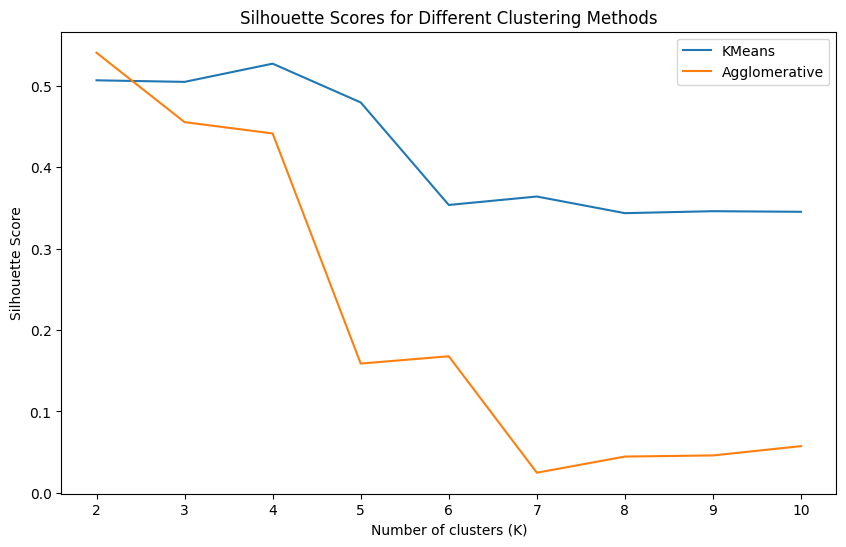

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores['KMeans'], label='KMeans')

plt.plot(K, silhouette_scores['Agglomerative'], label='Agglomerative')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clustering Methods')
plt.legend()
plt.show()

In [72]:
# DBSCAN clustering
eps_values = [0.3, 0.5, 0.7, 1.0]  # Valores de epsilon a probar
min_samples = 5  # Número mínimo de muestras
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_processed_TG12)
    if len(set(labels)) > 1:
        silhouette_scores['DBSCAN'].append(silhouette_score(X_processed_TG12, labels))
    else:
        silhouette_scores['DBSCAN'].append(-1)  # Si hay solo un cluster, el score es inválido

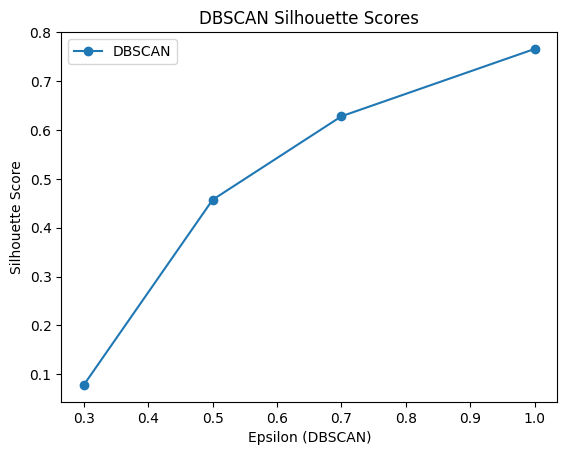

In [73]:
plt.plot(eps_values, silhouette_scores['DBSCAN'], label='DBSCAN', marker='o')
plt.xlabel('Epsilon (DBSCAN)')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Silhouette Scores')
plt.legend()
plt.show()

Cómo conclusiones observamos que si bien mejoraron las métricas para este segundo conjunto de datos tras haber reducido las variables a considerar, dado que estas variables no tenian mucha relación física y podría estar sesgando los datos. Ahora considerando un Cluster de 3 para ver si se ha identificado las condiciones operativas a diferentes condiciones.

In [74]:
#@title Cluster Optimo: 3
optimal_clusters = 3

In [75]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_processed_TG12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [76]:
df_KM = df_TG12
df_KM.head()

G2_DWATT    G2_CTIM     G2_AT1     G2_AT2     G2_AT3  G2_CSBHX  \
0  182.815323  50.662487  71.029396  70.565109  69.967819  0.595173   
1  178.347397  50.407425  70.565247  70.377708  69.787674  0.623664   
2  184.782959  50.722748  70.710602  70.235023  69.877747  0.596470   
3  184.081924  50.741253  70.764275  70.251274  69.691971  0.619411   
4  184.731506  50.684986  70.635910  70.276222  69.452171  0.639907   

   G2_efic_comp  Cluster  
0      0.934881        0  
1      0.935165        0  
2      0.936175        0  
3      0.936363        0  
4      0.936192        0

In [77]:
df_KM['Cluster'] = clusters
df_KM

<ipython-input-77-85b8c3c63253>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



G2_DWATT    G2_CTIM     G2_AT1     G2_AT2     G2_AT3  G2_CSBHX  \
0     182.815323  50.662487  71.029396  70.565109  69.967819  0.595173   
1     178.347397  50.407425  70.565247  70.377708  69.787674  0.623664   
2     184.782959  50.722748  70.710602  70.235023  69.877747  0.596470   
3     184.081924  50.741253  70.764275  70.251274  69.691971  0.619411   
4     184.731506  50.684986  70.635910  70.276222  69.452171  0.639907   
...          ...        ...        ...        ...        ...       ...   
7676  189.000305  50.139885  68.795067  68.289375  67.530708  0.327557   
7677  188.116074  50.046780  68.777649  68.380638  67.550522  0.306910   
7678  188.637253  49.480095  68.571426  66.939018  66.723991  0.263911   
7679  188.567825  49.538872  68.550705  67.585045  67.614159  0.270048   
7680  188.820969  50.102791  68.631027  68.186752  67.497887  0.303128   

      G2_efic_comp  Cluster  
0         0.934881        1  
1         0.935165        1  
2         0.936175        1  
3         0.936363        1  
4         0.936192        1  
...            ...      ...  
7676      0.931365        1  
7677      0.930834        1  
7678      0.930496        1  
7679      0.930622        1  
7680      0.932445        1  

[6887 rows x 8 columns]

In [78]:
cluster_summary = df_KM.groupby('Cluster').mean()

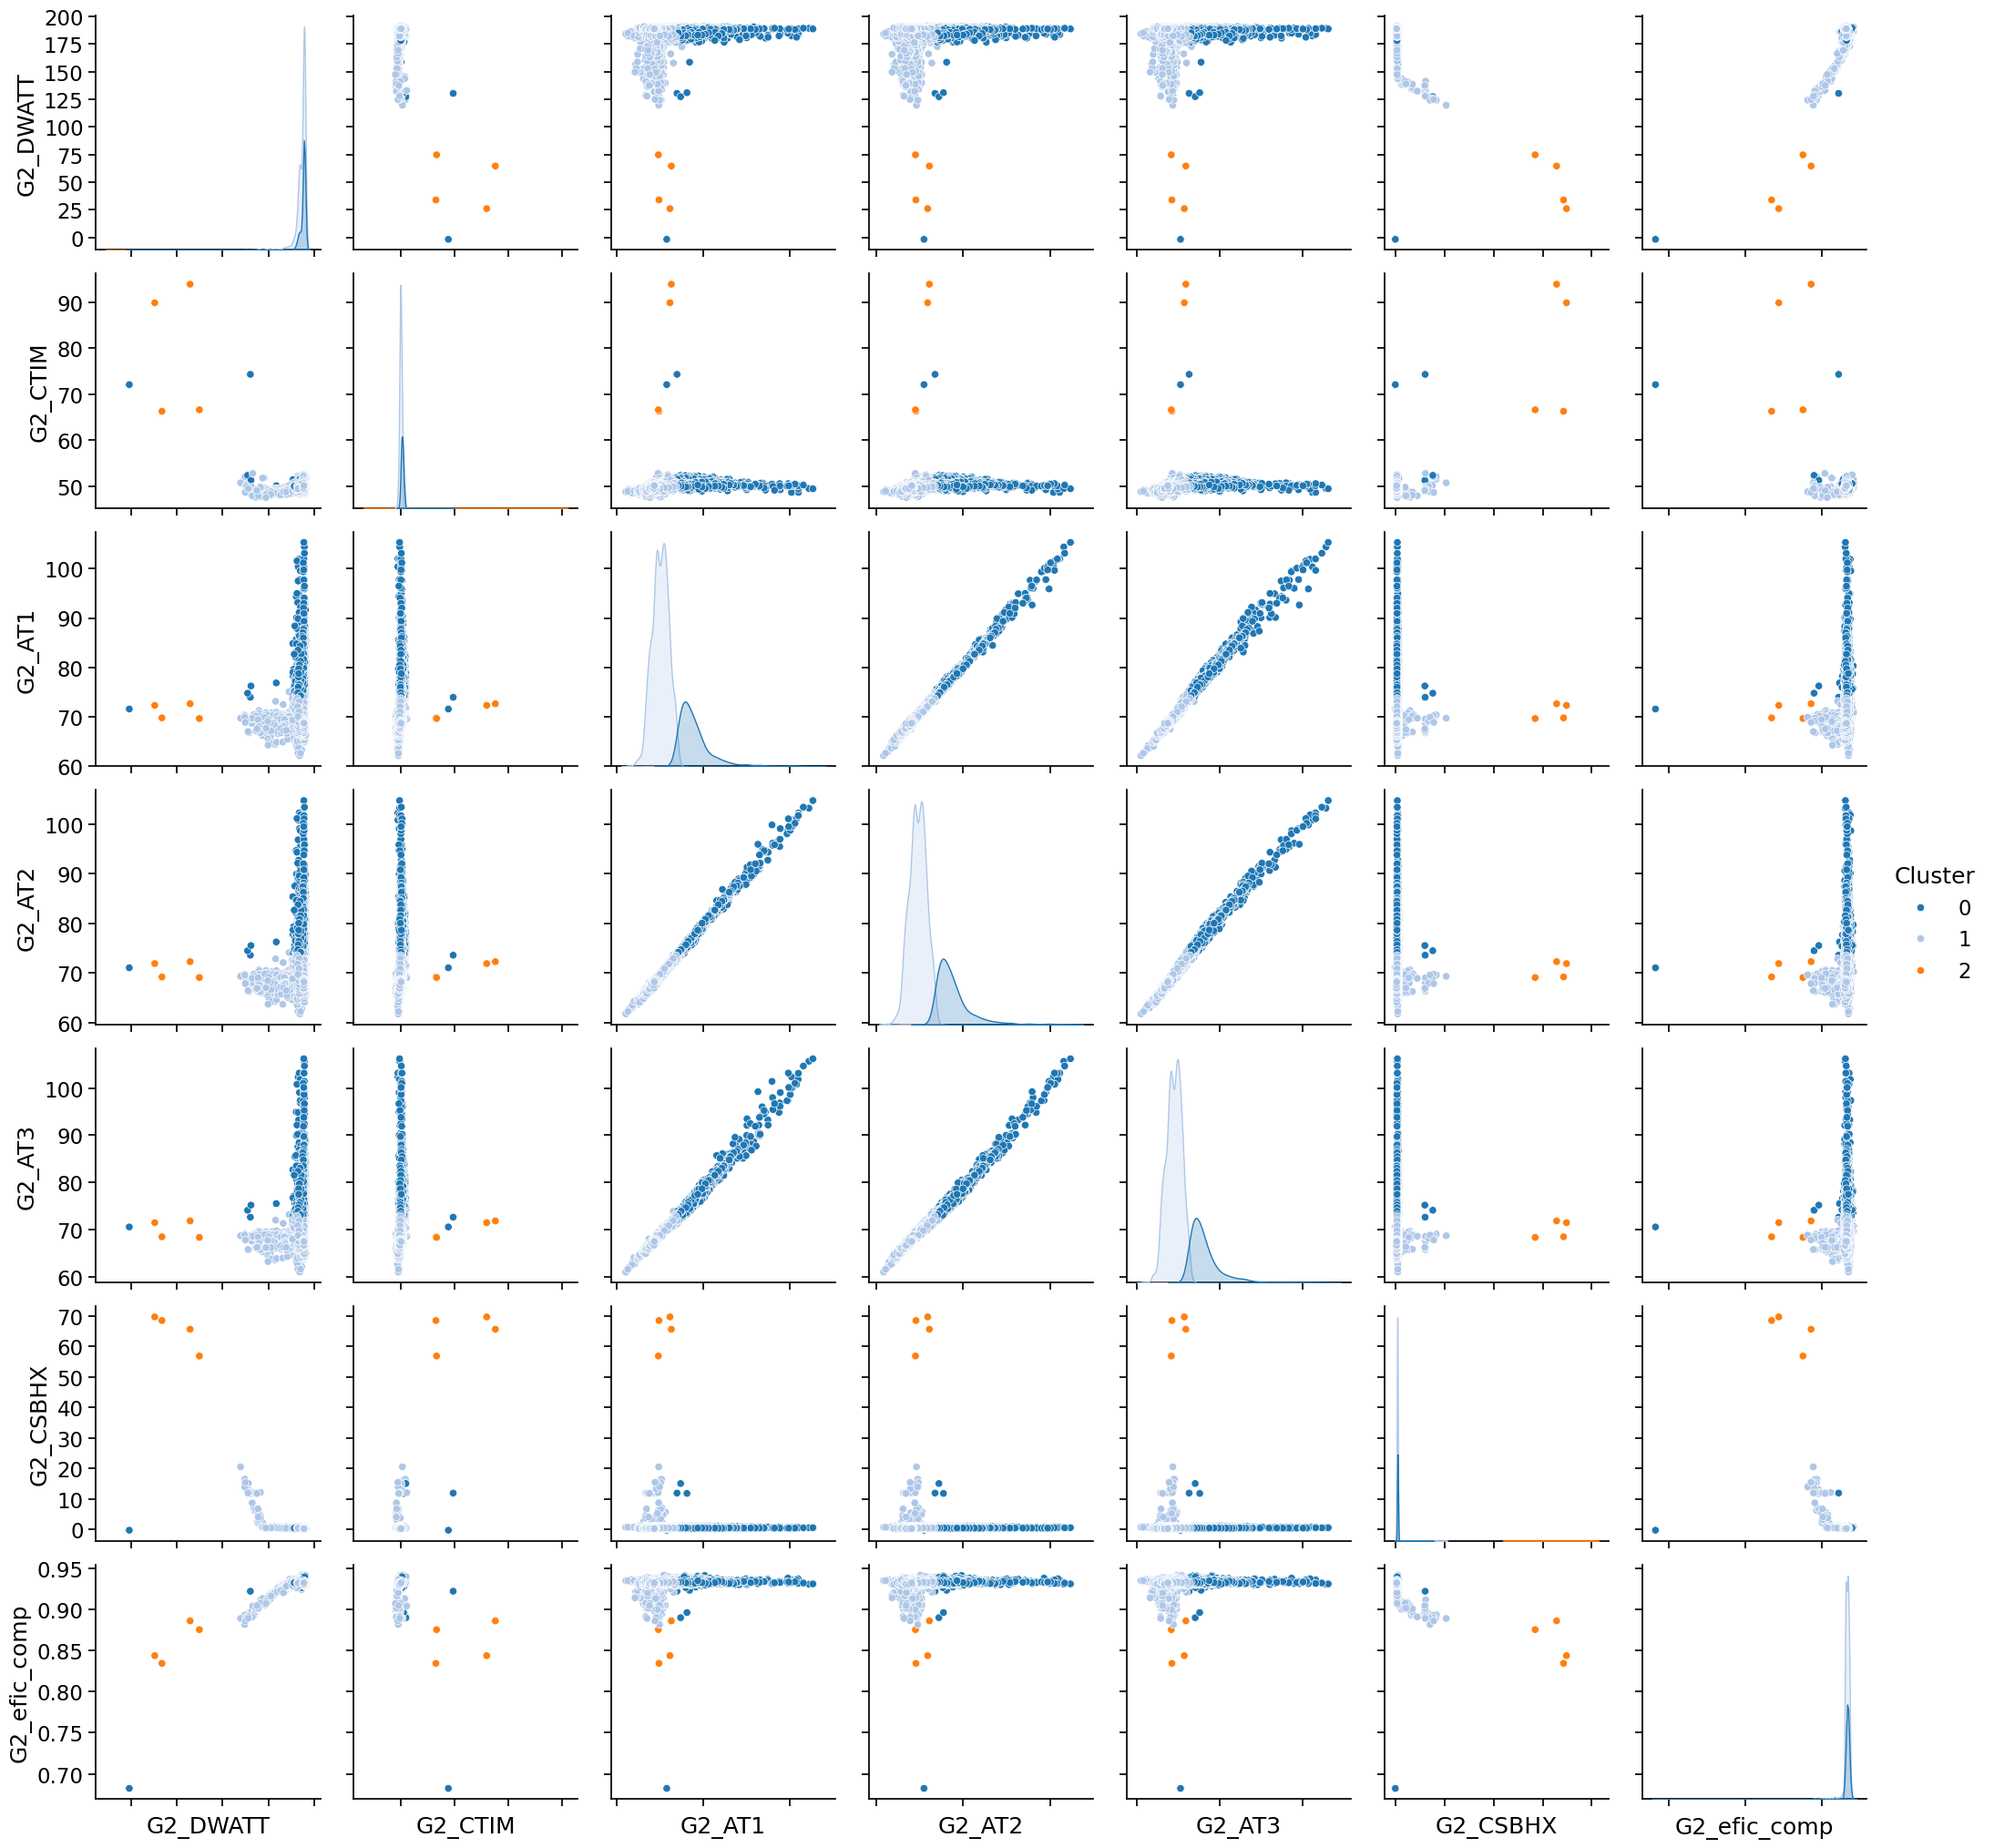

In [79]:
with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.pairplot(df_KM,
                     hue='Cluster', palette='tab20', height=3)
    g.set(xticklabels=[])

plt.show()

Observamos que el modelo clasificó en base a la potencia, vemos que las relaciones con los AT que son las temperaturas de ingreso a la casa de filtro están correlacionados a altas potencias, que operativamente serían en carga base, mientras que cuando estas se van reduciendo, se obtienen menores condciones.


Ai bien no se ha obtenido una clasificación como la que se quería, observamos que muchas de las condiciones operativas está fuertemente relacionadas a las condiciones externas. Es decir que para obtener los máximos puntos de generación de potencia usualmente se tienen que tener condiciones externas definidas y dado que la central está tratando de mantener estas condiciones, estas se vieron agrupadas. Mientras que el resto de condiciones operativas, que es cuando no se logra mantener el punto más optimo, se ve agrupado en el segundo grupo mas grande y finalmente tenemos valorespuntuales, que hasta podrían consdierarse valores anomalos en el comportamiento de la central.